In [5]:
# Checking virtual RAM memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


## This script contains:

##### 1. Import dataframe
##### 2. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample
##### 3. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles
##### 4. Create an appropriate visualization to show the distribution of profiles
##### 5. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
##### 6. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important
##### 7. Produce suitable charts to illustrate your results and export them in your project folder
##### 8. Tidy up your script, export your final data set, and save your notebook

### 1. Import dataframe

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Defining the url
path = 'drive/My Drive/Colab Notebooks/ords_prods_regions.pkl'

In [9]:
# Importing df as string
ords_prods = pd.read_pickle(path)

### 2. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [10]:
ords_prods.loc[ords_prods['max_order'] >= 5, 'exclusion_flag'] = 'High activity customer'

In [11]:
ords_prods.loc[ords_prods['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [12]:
ords_prods['exclusion_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: exclusion_flag, dtype: int64

In [13]:
# Replacing the original df to save memory
ords_prods = ords_prods[ords_prods['exclusion_flag'] == 'High activity customer']

In [14]:
# This is the df without the 'Low activity customer', what corresponds the 'orders_products_all' df
ords_prods.shape

(30964564, 35)

### 3. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [15]:
# I noticed this variables is causing an issue
ords_prods['dependants']
# Somehow there are two 'dependants' columns

,dependants,dependants
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
32404850,0,0
32404851,0,0
32404852,0,0
32404853,0,0


In [16]:
# Counting the values
ords_prods['dependants'].value_counts()
# ValueError: Grouper for 'dependants' not 1-dimensional

ValueError: ignored

In [17]:
# Addressing the issue
ords_prods = ords_prods.loc[:, ~ords_prods.columns.duplicated()]

In [18]:
# Checking if worked
ords_prods['dependants']
# Now, there is only 1 'dependants' column as was supposed to be

0           3
1           3
2           3
3           3
4           3
           ..
32404850    0
32404851    0
32404852    0
32404853    0
32404854    0
Name: dependants, Length: 30964564, dtype: int64

> CUSTOMER PROFILES

> Young Without Children: Age 18-30. Number of Dependents = 0

> Young With Children: Age 18-30. Number of Dependents > 0

> Middle-age Without Children: Age 31-60. Number of Dependents = 0

> Middle-age With Children: Age 31-60. Number of Dependents > 0

> Senior Without Children: Age 61+. Number of Dependents = 0

> Senior With Children: Age 61+. Number of Dependents > 0



In [19]:
# Create an empty column 'profile' with default value (None)
ords_prods['profile'] = None

In [20]:
# Young Without Children
young_without_children = (ords_prods['age'].between(18, 30)) & \
                           (ords_prods['dependants'] == 0)

ords_prods.loc[young_without_children, 'profile'] = 'Young Without Children'

In [21]:
# Young With Children
young_parent = (ords_prods['age'].between(18, 30)) & \
               (ords_prods['dependants'] > 0)

ords_prods.loc[young_parent, 'profile'] = 'Young With Children'

In [22]:
# Middle-aged Without Children
middle_agged_without_children = (ords_prods['age'].between(31, 60)) & \
                (ords_prods['dependants'] == 0)

ords_prods.loc[middle_agged_without_children, 'profile'] = 'Middle-age Without Children'

In [23]:
# Middle-aged With Children
middle_agged_with_children = (ords_prods['age'].between(31, 60)) & \
                 (ords_prods['dependants'] > 0)

ords_prods.loc[middle_agged_with_children, 'profile'] = 'Middle-age With Children'

In [24]:
# Senior Without Children
senior_low_income = (ords_prods['age'] > 60) & \
                    (ords_prods['dependants'] == 0)

ords_prods.loc[senior_low_income, 'profile'] = 'Senior Without Children'

In [25]:
# Senior With Children
senior_with_children = (ords_prods['age'] > 60) & \
                       (ords_prods['dependants'] > 0)

ords_prods.loc[senior_with_children, 'profile'] = 'Senior With Children'

### 4. Create an appropriate visualization to show the distribution of profiles.

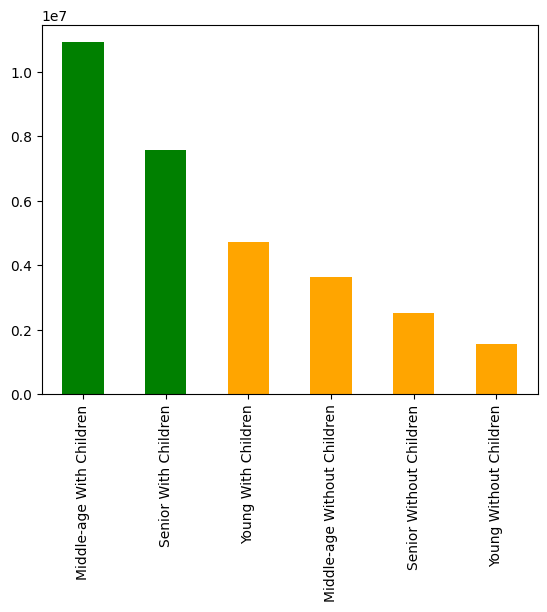

In [26]:
# Creating a bar chart
bar = ords_prods['profile'].value_counts().plot.bar(color=['green', 'green', 'orange', 'orange', 'orange', 'orange'])

### 5. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [27]:
# Group by 'profile' and calculate the max, mean, and min for 'frequency' and 'expenditure'
aggregated_data = ords_prods.groupby('profile').agg({
    'regularity': ['max', 'mean', 'min'],
    'avg_price': ['max', 'mean', 'min']
})

In [28]:
# Checking result
aggregated_data

regularity                 avg_price             \
                                   max       mean  min       max       mean   
profile                                                                       
Middle-age With Children          29.0  10.246531  0.0    6984.0  11.842806   
Middle-age Without Children       29.0  10.182053  0.0   15008.0  12.301582   
Senior With Children              29.0  10.227695  0.0    7416.0  11.864079   
Senior Without Children           29.0  10.170480  0.0   14040.0  11.633121   
Young With Children               29.0  10.223789  0.0   10208.0  11.977298   
Young Without Children            28.0  10.353861  0.0    8792.0  12.399234   

                                       
                                  min  
profile                                
Middle-age With Children     1.000000  
Middle-age Without Children  1.000000  
Senior With Children         1.259766  
Senior Without Children      1.309570  
Young With Children          1.629883  
Young Without Children       2.099609

### 6. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [29]:
# Create a pivot table to show customer profile counts across regions
pivot_regions = pd.pivot_table(ords_prods, index='region', columns='profile', aggfunc='size', fill_value=0)

In [30]:
# Checking pivot table created
pivot_regions

profile,Middle-age With Children,Middle-age Without Children,Senior With Children,Senior Without Children,Young With Children,Young Without Children
region,,,,,,
Region 1 (Northeast),1934831,609365,1348823,460190,826549,284927
Region 2 (Midwest),2570599,873097,1761892,594878,1106206,354841
Region 3 (South),3621594,1201414,2522975,838254,1584637,542265
Region 4 (West),2787485,949332,1945816,639779,1213476,391339


In [31]:
# Mapping department names
department_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}


In [32]:
# Replace department_id with department names
ords_prods['department'] = ords_prods['department_id'].map(department_names)

In [33]:
# Creating a pivot table to show customer profile counts across departments
pivot_depart = pd.pivot_table(ords_prods, index='department', columns='profile', aggfunc='size', fill_value=0)

In [34]:
# Checking pivot table
pivot_depart

profile,Middle-age With Children,Middle-age Without Children,Senior With Children,Senior Without Children,Young With Children,Young Without Children
department,,,,,,
alcohol,50225,18339,34185,11443,23390,7045
babies,145464,47839,99836,33183,61764,22306
bakery,394317,132899,274361,91656,170755,56840
beverages,905036,302937,633122,211565,388402,130839
breakfast,237248,78428,163326,54213,103844,33791
bulk,11797,3765,8372,2557,5282,1678
canned goods,355937,118408,248667,80818,156450,51794
dairy eggs,1824231,608731,1263593,424351,794982,261294
deli,351695,119419,245870,83097,152887,50866


### 7. Produce suitable charts to illustrate your results and export them in your project folder

In [35]:
# Selecting the top 10 departments based on customer counts for each profile
top_10_departments = pivot_depart.nlargest(10, columns=['Middle-age With Children', 'Middle-age Without Children',
                                                       'Senior With Children', 'Senior Without Children',
                                                       'Young With Children', 'Young Without Children'])

In [36]:
# Sorting the top 10 departments in descending order
top_10_departments_sorted = top_10_departments.sum(axis=1).sort_values(ascending=False).index
top_10_departments = top_10_departments.loc[top_10_departments_sorted]

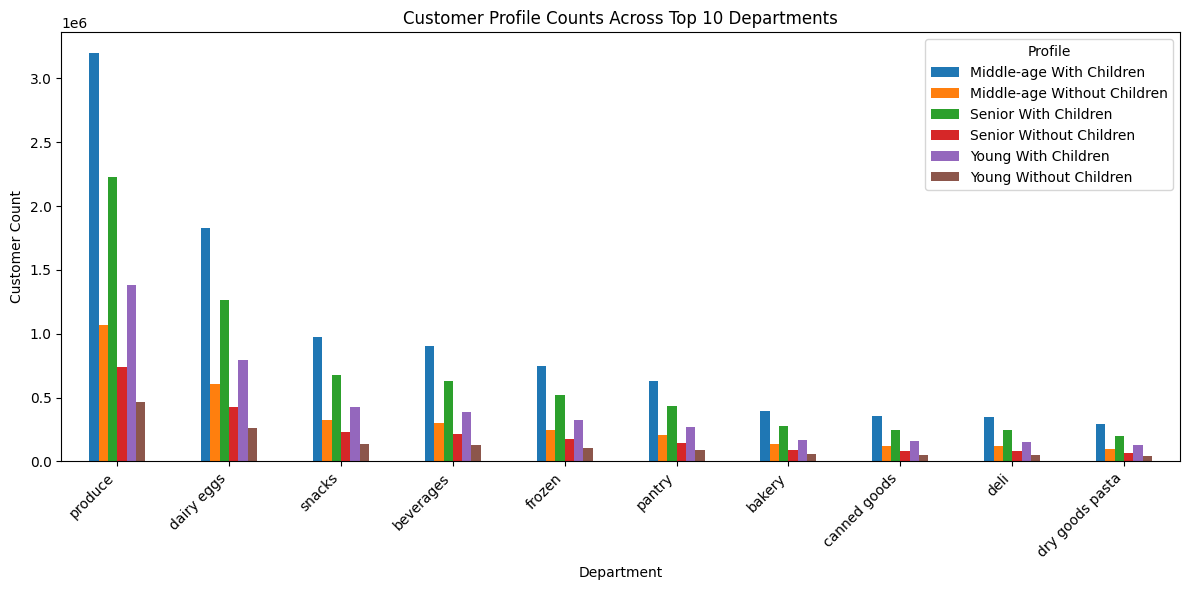

In [37]:
# Creating a bar chart for customer profile counts across the top 10 departments
top_10_departments.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Department')
plt.ylabel('Customer Count')
plt.title('Customer Profile Counts Across Top 10 Departments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Profile')
plt.tight_layout()
plt.show()

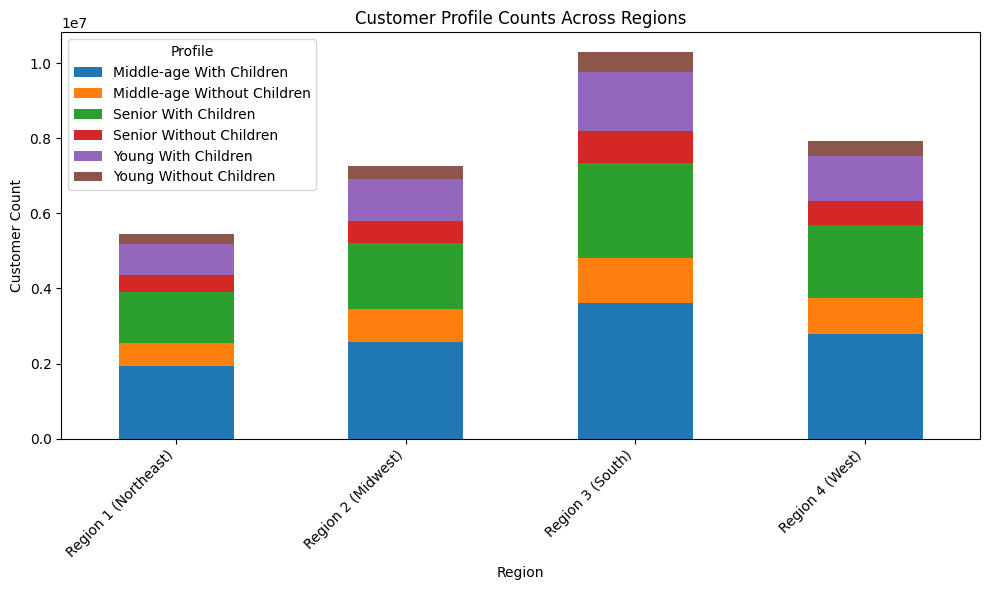

In [38]:
# Creating a stacked bar chart for customer profile counts across regions
pivot_regions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.title('Customer Profile Counts Across Regions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Profile')
plt.tight_layout()
plt.show()

In [ ]:
# Creating a pivot table to show price-range across regions
pivot_price = pd.pivot_table(ords_prods, index='region', columns='price_range_loc', aggfunc='size', fill_value=0)

In [ ]:
# Checking pivot table
pivot_price

In [ ]:
# Creating the stacked bar chart
pivot_price.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='YlGnBu')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Price range Across Regions')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
# Creating a pivot table to show customer ordering habits across regions
pivot_habits = pd.pivot_table(ords_prods, index='region', columns='price_range_loc', values='order_id', aggfunc='nunique', fill_value=0)

In [43]:
# Checking pivot table
pivot_habits

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Region 1 (Northeast),61463,473180,525195
Region 2 (Midwest),82003,629536,699333
Region 3 (South),116704,894419,992492
Region 4 (West),89726,686358,761431


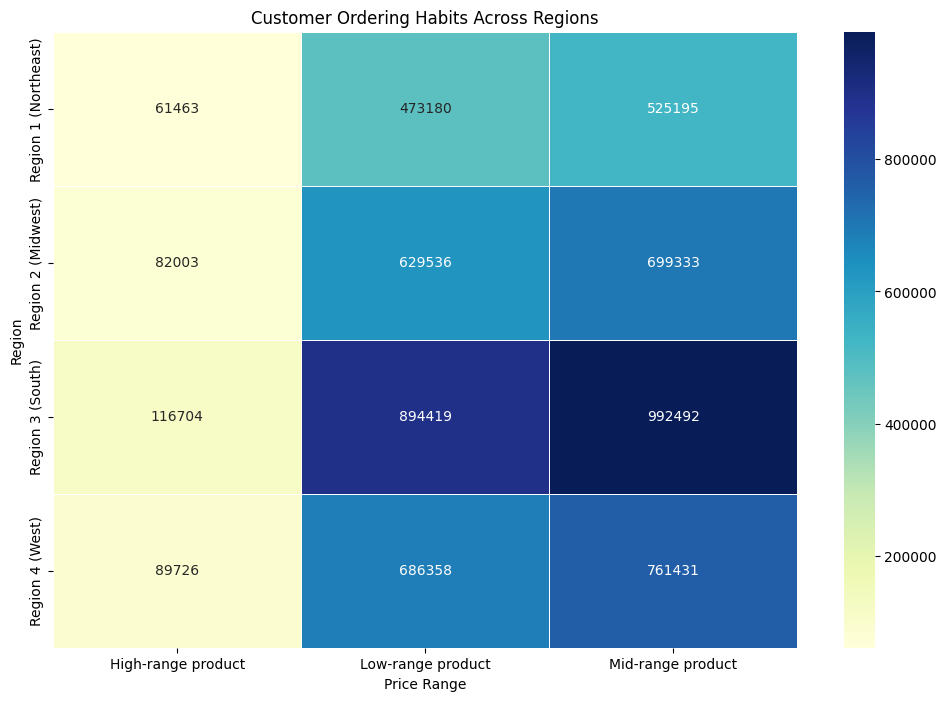

In [44]:
# Creating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_habits, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Price Range')
plt.ylabel('Region')
plt.title('Customer Ordering Habits Across Regions')
plt.show()

In [45]:
# Creating a pivot table to show customer ordering habits across loyalty status and price range location
pivot_loyalty_habits = pd.pivot_table(ords_prods, index='loyalty_flag', columns='price_range_loc', aggfunc='size', fill_value=0)

In [46]:
# Checking pivot table
pivot_loyalty_habits

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


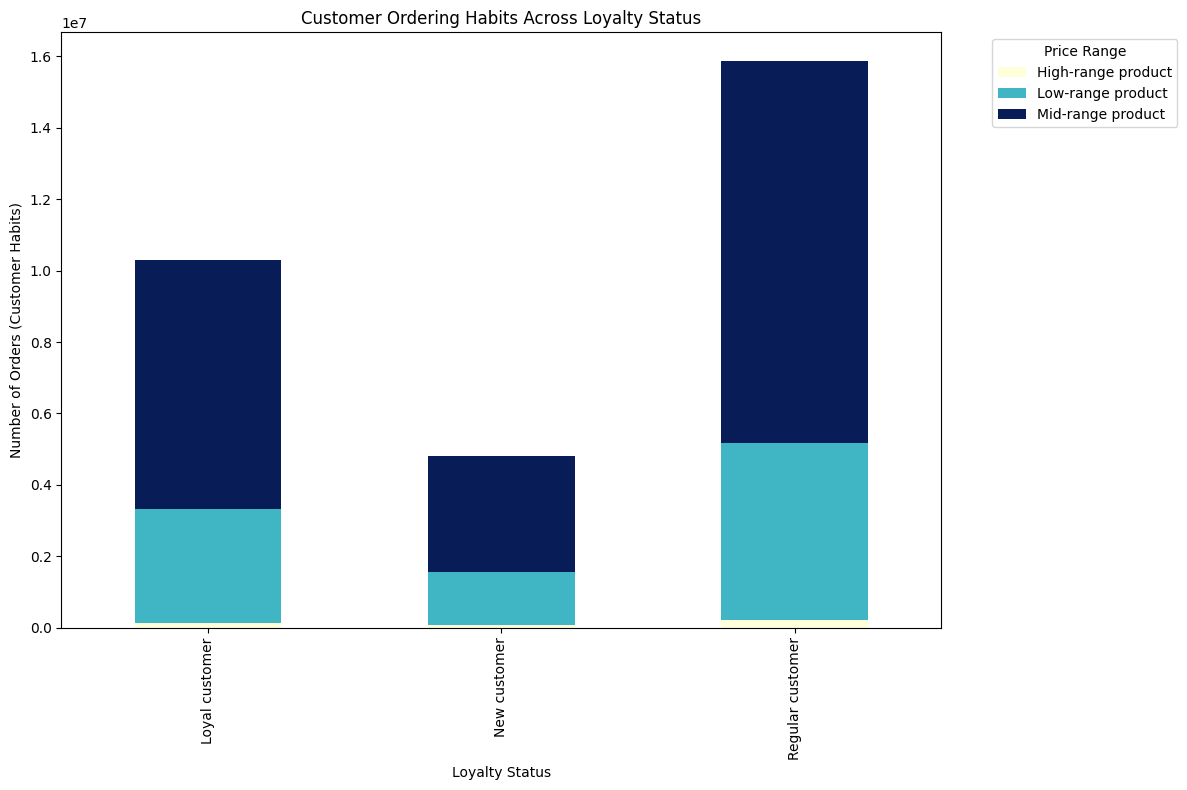

In [47]:
# Creating a stacked bar chart
pivot_loyalty_habits.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='YlGnBu')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Orders (Customer Habits)')
plt.title('Customer Ordering Habits Across Loyalty Status')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Is there a connection between age and family status in terms of ordering habits?**

In [54]:
# Creating pivot table
pivot_status = pd.pivot_table(ords_prods, index='profile', columns=['status', 'spending_flag'], aggfunc='size', fill_value=0)

In [73]:
# Checking pivot table
pivot_status

frequency_flag              Frequent customer                                \
department_id                              1     2       3        4      5    
profile                                                                       
Middle-age With Children               411326  6931  233913  1941534  29743   
Middle-age Without Children            134628  2468   79468   651366  11949   
Senior With Children                   287137  4878  164533  1352885  21016   
Senior Without Children                 97349  1691   54473   450764   7127   
Young With Children                    180121  3526  102112   842277  14689   
Young Without Children                  54640  1147   33355   276264   4438   

frequency_flag                                                   ...  \
department_id                   6       7      8       9     10  ...   
profile                                                          ...   
Middle-age With Children     51589  539510  17409  160635  7820  ...   
Middle-age Without Children  17011  181793   5289   52110  2552  ...   
Senior With Children         35004  382205  12524  110269  5554  ...   
Senior Without Children      11996  125710   4424   37566  1659  ...   
Young With Children          22247  231432   7795   70504  3633  ...   
Young Without Children        7957   77188   2303   23134  1076  ...   

frequency_flag              Regular customer                                 \
department_id                             12      13     14      15      16   
profile                                                                       
Middle-age With Children               94511  240299  86292  143195  650361   
Middle-age Without Children            30546   80503  29056   47031  215380   
Senior With Children                   65016  166273  60730   99147  450047   
Senior Without Children                22098   54655  20668   32446  153197   
Young With Children                    40481  103389  37886   62560  280308   
Young Without Children                 13671   35129  12637   21096   97358   

frequency_flag                                                    
department_id                    17     18      19      20    21  
profile                                                           
Middle-age With Children     103032  43693  351373  135574  6972  
Middle-age Without Children   33743  14044  116697   45311  2294  
Senior With Children          69390  30332  241193   93077  4979  
Senior Without Children       23097  10737   81736   31679  1596  
Young With Children           43405  18902  151236   57847  3101  
Young Without Children        14418   7209   54240   20873  1145  

[6 rows x 63 columns]

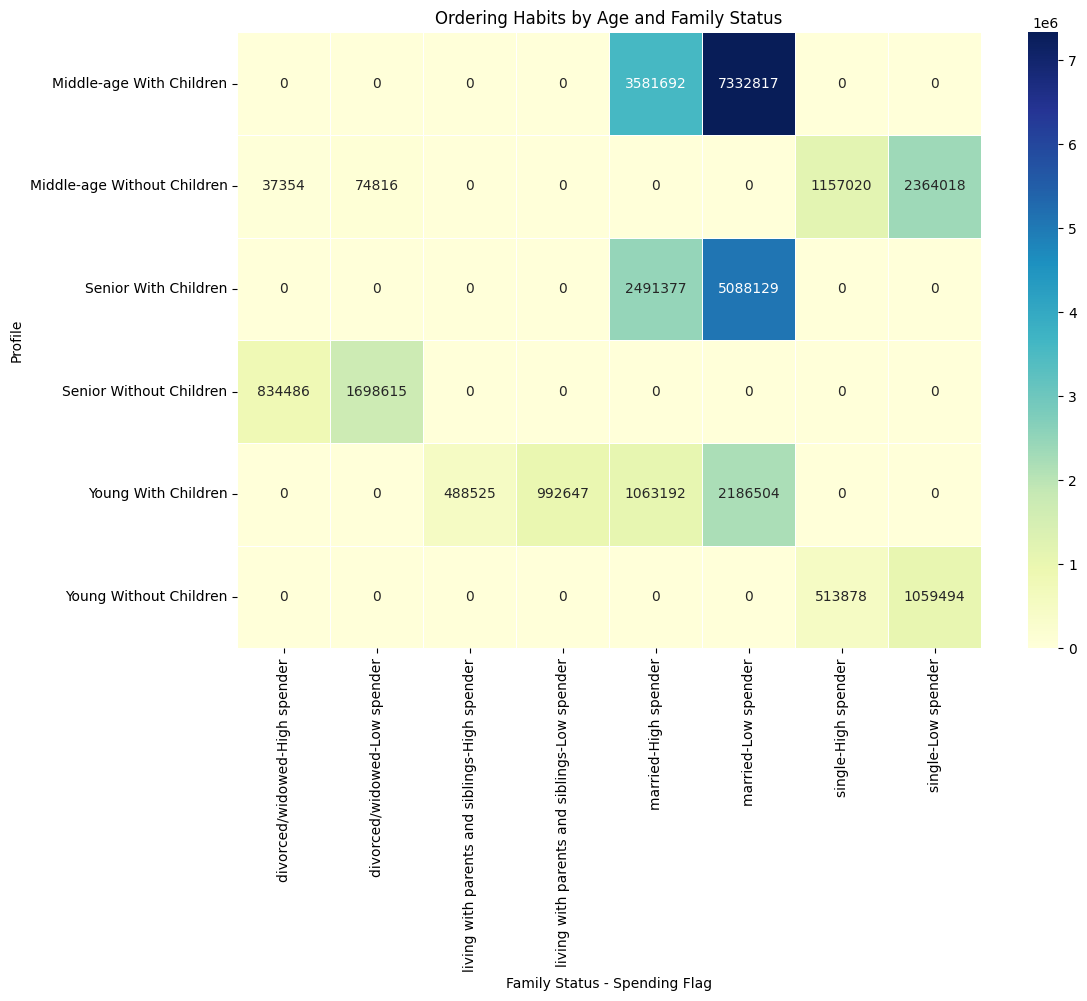

In [58]:
# Ploting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_status, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Family Status - Spending Flag')
plt.ylabel('Profile')
plt.title('Ordering Habits by Age and Family Status')
plt.show()

**What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of**

In [69]:
# Creating pivot table
pivot_frequency = pd.pivot_table(ords_prods, index='department', columns=['profile'], aggfunc='size', fill_value=0)

In [70]:
# Checking frequency
pivot_frequency

profile,Middle-age With Children,Middle-age Without Children,Senior With Children,Senior Without Children,Young With Children,Young Without Children
department,,,,,,
alcohol,50225,18339,34185,11443,23390,7045
babies,145464,47839,99836,33183,61764,22306
bakery,394317,132899,274361,91656,170755,56840
beverages,905036,302937,633122,211565,388402,130839
breakfast,237248,78428,163326,54213,103844,33791
bulk,11797,3765,8372,2557,5282,1678
canned goods,355937,118408,248667,80818,156450,51794
dairy eggs,1824231,608731,1263593,424351,794982,261294
deli,351695,119419,245870,83097,152887,50866


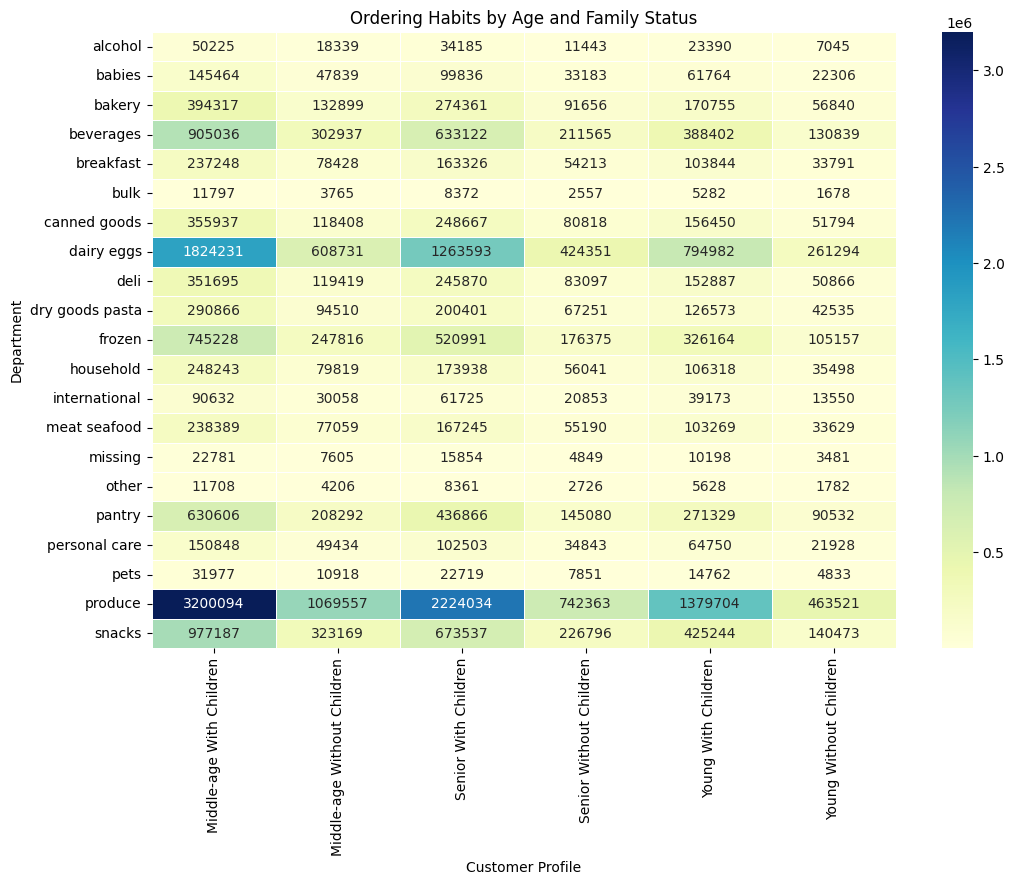

In [72]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_frequency, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Customer Profile')
plt.ylabel('Department')
plt.title('Ordering Habits by Age and Family Status')
plt.show()

### 8. Tidy up your script, export your final data set, and save your notebook

In [ ]:
# Exporting df as pickle to my Google Drive
ords_prods.to_pickle('/content/drive/My Drive/Colab Notebooks/ords_prods_all.pkl')